# Exploratory Data Analysis on E-Commerce Sales Data

In [ ]:
# pip install matplotlib
# pip install seaborn
# pip install openpyxl

In [6]:
# pandas for for data manipulation and analysis
# matplotlib and seaborn for data visualization
# numpy for processing n-dimensional arrays 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset Analysis

In [28]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [149]:
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523,2011


In [32]:
dataset.shape

(9426, 24)

In [33]:
#identify fields with missing values
dataset.isnull().sum()  

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [34]:
# fill missing values - mean, median, fixed constant
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


C:\Users\Shreya\AppData\Local\Temp\ipykernel_3696\540688717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


In [35]:
dataset.isnull().sum()  

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [36]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [37]:
dataset.shape

(9426, 24)

## Univariate Analysis

### Order Priorities

In [38]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [41]:
#data cleaning
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ","Critical")

In [42]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

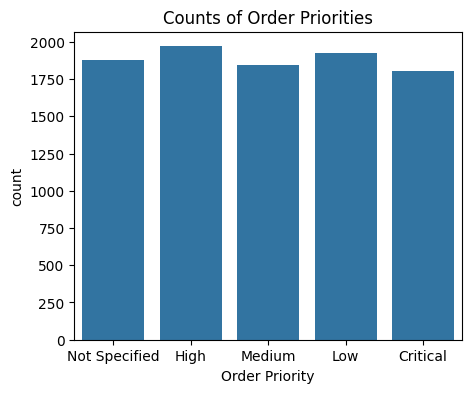

In [55]:
plt.figure(figsize=(5,4)) # reduce fig size
#compute and display graph
sns.countplot(x="Order Priority", data=dataset) 
plt.title("Counts of Order Priorities")
plt.savefig("Counts of Order Priorities.png")
plt.show()

Suggestions I could come up with using the insights:

- __Resource Allocation__: Evaluate whether our current resources are aligned with the distribution of order priorities. If High and Critical priority orders are consistently higher, allocate more resources such as manpower, inventory, and equipment to fulfill these orders promptly and ensure customer satisfaction. If Low priority orders dominate, streamline processes to handle them efficiently without overcommitting resources.

- __Performance Metrics__: Establish key performance indicators (KPIs) related to order priorities, such as on-time delivery rates or order fulfillment cycle times. Continuously monitor these metrics to track performance trends and identify opportunities for optimization or process refinement.

 ### Shipping Modes

In [56]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [63]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

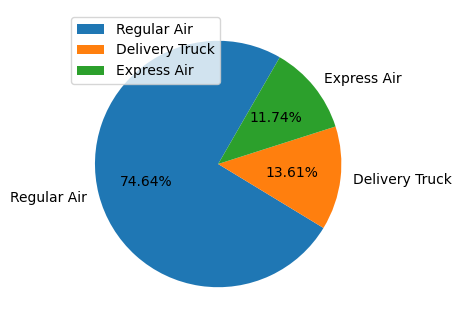

In [81]:
plt.figure(figsize=(4,4))
plt.pie(y, labels=x, startangle=60, autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

Suggestions I could come up with using the insights:

- __Cost Optimization__: Evaluate the cost-effectiveness of each shipping mode. If one mode is significantly more expensive than others, consider renegotiating contracts with carriers or adjusting pricing strategies to minimize costs

- __Customer Preferences__: Understanding which ship mode customers prefer can help tailor marketing and sales strategies. For instance, if Express Air is the least chosen option, we could promote its benefits such as faster delivery times or more reliable tracking to attract more customers towards it.

- __Environmental Impact__: Assess the environmental footprint of each shipping method and consider promoting eco-friendly options. Customers increasingly value sustainable practices

### Customer Segment

In [128]:
dataset['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

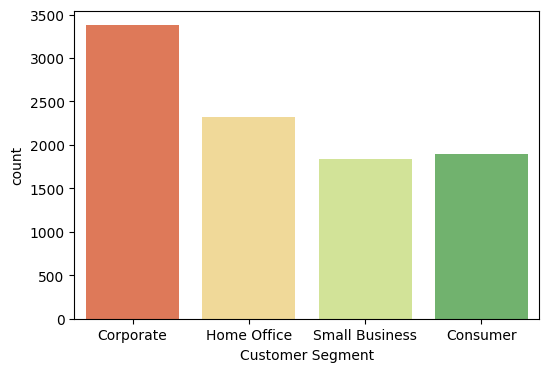

In [156]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data=dataset, palette='RdYlGn')
plt.show()

Suggestions I could come up with using the insights:
- __Segment-specific Marketing Strategies__: Tailor the marketing efforts to target each customer segment more effectively. For example, develop promotional campaigns or product bundles that resonate with the needs and preferences of Corporate clients, Home Office users, Consumers, and Small Businesses. Understanding the unique characteristics and pain points of each segment can help to craft compelling messaging and offers.

- __Customer Service Customization__: Tailor the customer service approach to meet the expectations of different customer segments. For example, Corporate clients may require dedicated account managers or personalized support channels, while Consumers may prefer self-service options or responsive online chat support.

### Product Category

In [129]:
dataset['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

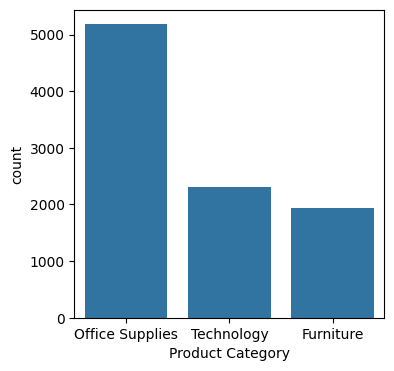

In [91]:
plt.figure(figsize=(4,4))
sns.countplot(x="Product Category", data=dataset)
plt.show()

 Offer bundled packages or promotional discounts for combined purchases of complementary products. Leverage customer data and analytics to identify cross-selling opportunities and personalize recommendations.

## Bi-Variate Analysis

### Product Category by Shipping Mode

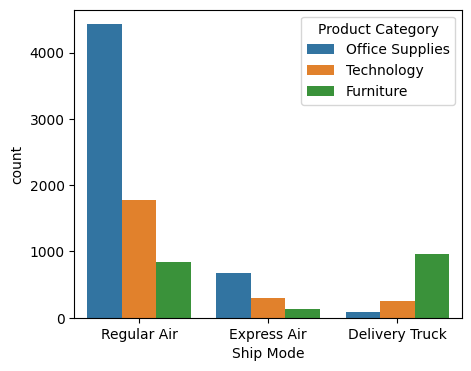

In [85]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=dataset, hue="Product Category")
plt.show()

Suggestions I could come up with using the insights:

- __Price Optimization__: Analyze pricing strategies for each product category and shipping mode combination. Consider adjusting prices based on demand, competitor pricing, and customer willingness to pay. Implement dynamic pricing algorithms or offer tiered pricing options to capture maximum value while remaining competitive in the market.

- __Cost Reduction__: Identify opportunities to reduce costs associated with shipping modes, such as negotiating better rates with shipping carriers, optimizing packaging to minimize dimensional weight charges

### Products by Category and Sub Category

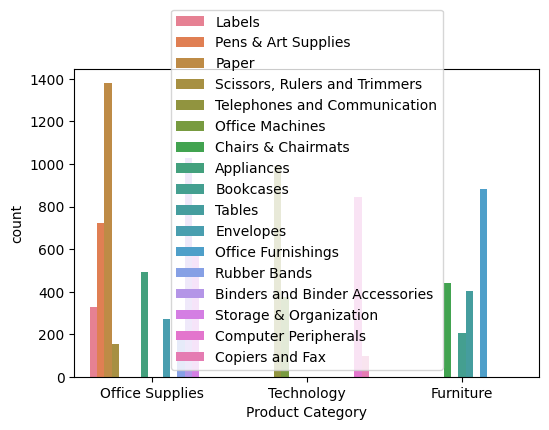

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data=dataset, hue="Product Sub-Category")
plt.legend(loc=0)
plt.show()

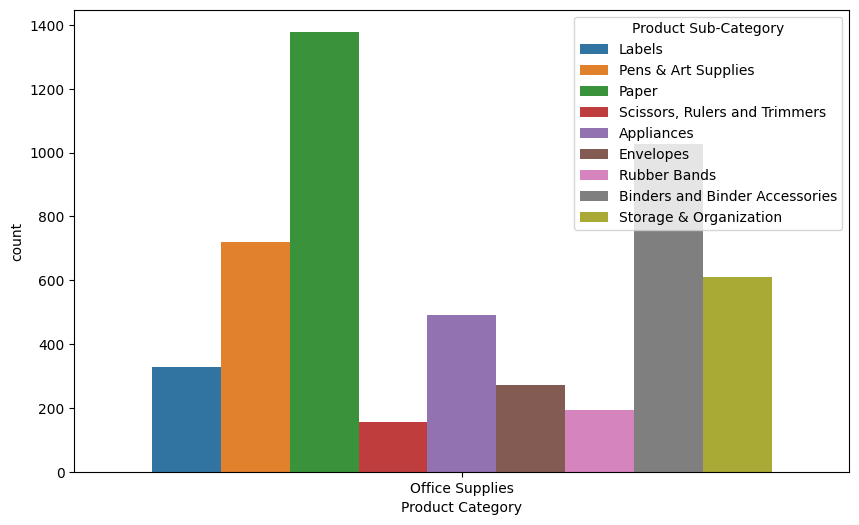

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.show()

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

### Product Sales per Year

In [109]:
dataset["Order Year"] = dataset['Order Date'].dt.year

In [112]:
dataset["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

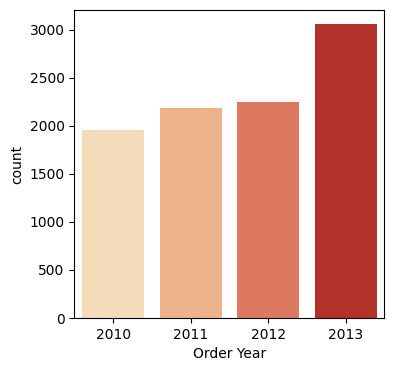

In [167]:
plt.figure(figsize=(4,4))
sns.countplot(x=dataset['Order Year'], data=dataset, palette='OrRd')
plt.show()

Suggestions to increase growth in sales and retaining the existing customer base

- __Market Analysis__: Analyze sales data to identify top-performing products and assess market demand trends. Focus on promoting high-margin products and phasing out low-performing or outdated items. Continuously update your product mix to align with customer preferences and market trends, ensuring maximum profitability.

- __Customer Retention and Loyalty Programs__: Implement customer retention initiatives. Launch loyalty programs, offer exclusive discounts or rewards, and personalize marketing communications to engage customers and encourage repeat purchases. Cultivate strong relationships with existing customers.

### Profit per Product Category

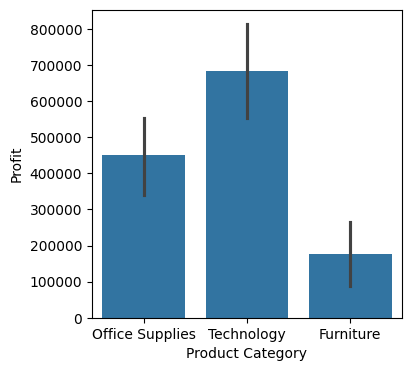

In [122]:
plt.figure(figsize=(4,4))
sns.barplot(x=dataset['Product Category'], y="Profit", data=dataset, estimator="sum")
plt.show()

### Profit Margin per Product Category

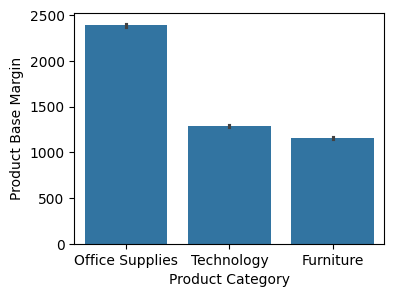

In [126]:
plt.figure(figsize=(4,3))
sns.barplot(x=dataset['Product Category'], y="Product Base Margin", data=dataset, estimator="sum")
plt.show()

Suggestions for the e-commerce platform/website based on the above insights:

- __Featured Product Promotion__: Highlight high-profit margin products prominently on your website. Use banners, featured product sections, and targeted advertising to draw attention to these products and encourage purchases.

- __Dynamic Pricing__: Implement dynamic pricing strategies to adjust product prices based on demand, competition, and inventory levels. Use pricing algorithms and real-time data analysis to optimize prices for maximum profit while remaining competitive in the market.

- __Upselling and Cross-Selling__: Recommend related products or upgrades to customers during the checkout process to increase order value and profitability.

### Sales according to State/Province

In [124]:
x=dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

Text(0, 0.5, 'Total Sales')

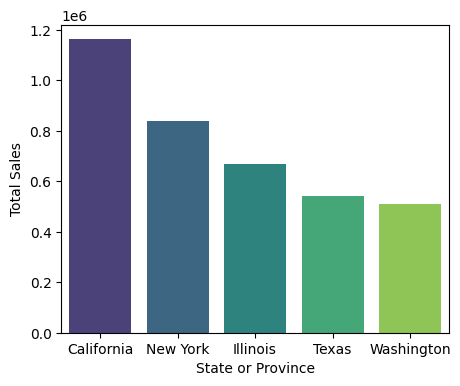

In [168]:
# Calculate total sales for each state
state_sales = dataset.groupby('State or Province')['Sales'].sum().reset_index()

# Select top 5 states with maximum sales
top_5_states = state_sales.nlargest(5, 'Sales')

# Plot the top 5 states
plt.figure(figsize=(5, 4))
sns.barplot(x='State or Province', y='Sales', data=top_5_states, palette='viridis')
plt.xlabel('State or Province')
plt.ylabel('Total Sales')

Suggestions:

- __Targeted Marketing Campaigns__: Allocate resources and marketing efforts towards expanding the presence in high-performing areas, such as California and Texas, to increase market penetration and capture a larger share of the market.

- __Localized Marketing Campaigns__: Tailor marketing campaigns and promotional offers to target customers in specific states or provinces. Use regional preferences, demographics, and cultural factors to personalize marketing messages and increase customer engagement.

- __Competitor Analysis__: Monitor competitors' activities and market presence in high-sales states to identify opportunities and threats. 